In [1]:
# 1. Carga de librerías para el proyeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib


In [2]:
# 2. Inspección de datos inicial
data = pd.read_csv('bank-additional-full.csv', sep=';')


display(data.head())
display(data.dtypes)
display(data.info())
display(data.describe(include='all'))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [3]:
#3 Tratamieno de datos nulos, faltantes y duplicados.

#Datos núlos

display(data.isnull().sum())
display(data.isna().sum())

#Datos unknown

print("Número de 'unknown' por columna categórica:")
for column in data.select_dtypes(include=['object']).columns:
    display(f"column:{column}")
    display(data[column].value_counts().get('unknown', 0))

#Datos duplicados

print("Número de filas duplicadas:")
display(data.duplicated().sum())
display(data[data.duplicated()])



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Número de 'unknown' por columna categórica:


'column:job'

np.int64(330)

'column:marital'

np.int64(80)

'column:education'

np.int64(1731)

'column:default'

np.int64(8597)

'column:housing'

np.int64(990)

'column:loan'

np.int64(990)

'column:contact'

0

'column:month'

0

'column:day_of_week'

0

'column:poutcome'

0

'column:y'

0

Número de filas duplicadas:


np.int64(12)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [4]:
# 3.1 tratamiento de datos invalidos, duplicados y faltantes.

#Generando una copia del dataset origial
df = data.copy()

#Conversión de unknown a NaN
df.replace('unknown', np.nan, inplace=True)

#Conversión de NaN a valores apropiados en cada columna
#Para valores categóricos:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
	df[col] = df[col].fillna(df[col].mode()[0])

#Para valores numéricos:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
	df[col] = df[col].fillna(df[col].mean())

In [5]:
#Validación de datos

print("Duplicados:", df.duplicated().sum())
print("Total NaN:", df.isna().sum().sum())
print("Total 'unknown':", (df == 'unknown').sum().sum())

Duplicados: 14
Total NaN: 0
Total 'unknown': 0


4. análisis EDA

In [6]:
#Análisis de datos según tipo de variable

cateorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
cateorical_cols, numeric_cols

#Análisis univariado de datos numéricos
display(df[numeric_cols].describe())


#Análisis univariado de datos categóricos
for col in cateorical_cols:
    print(f"Análisis de la columna: {col}")
    display(df[col].value_counts())
    print("\n")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Análisis de la columna: job


job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64



Análisis de la columna: marital


marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64



Análisis de la columna: education


education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64



Análisis de la columna: default


default
no     41185
yes        3
Name: count, dtype: int64



Análisis de la columna: housing


housing
yes    22566
no     18622
Name: count, dtype: int64



Análisis de la columna: loan


loan
no     34940
yes     6248
Name: count, dtype: int64



Análisis de la columna: contact


contact
cellular     26144
telephone    15044
Name: count, dtype: int64



Análisis de la columna: month


month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64



Análisis de la columna: day_of_week


day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64



Análisis de la columna: poutcome


poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64



Análisis de la columna: y


y
no     36548
yes     4640
Name: count, dtype: int64

5. Visualización de datos

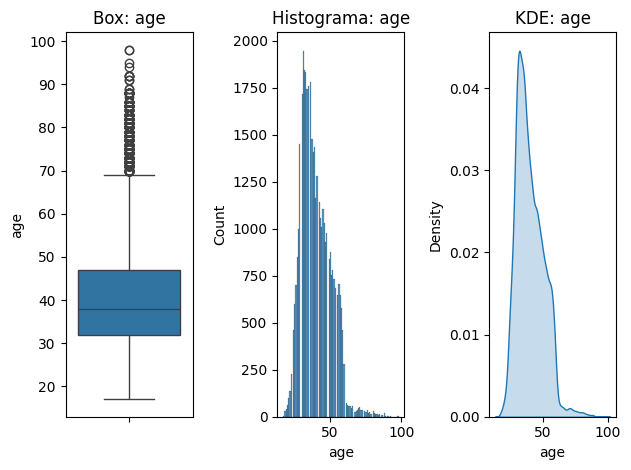

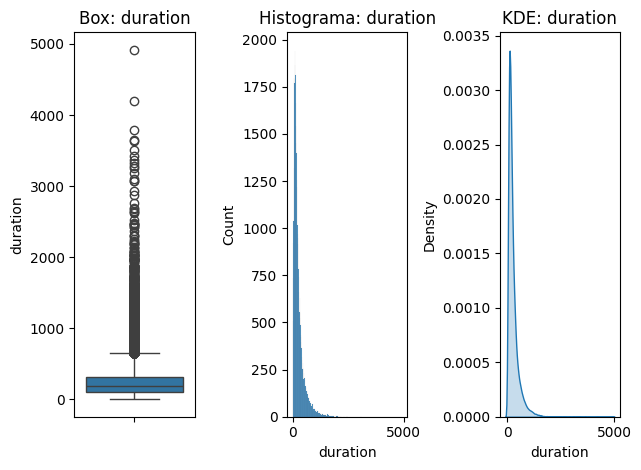

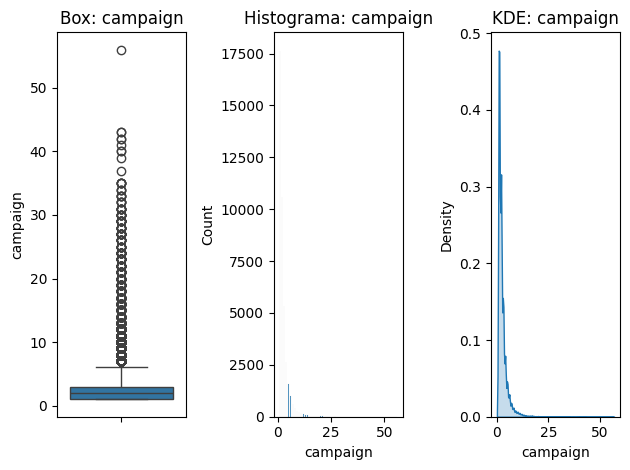

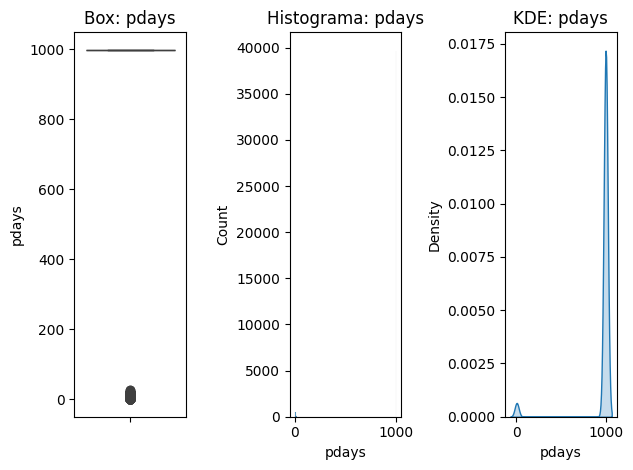

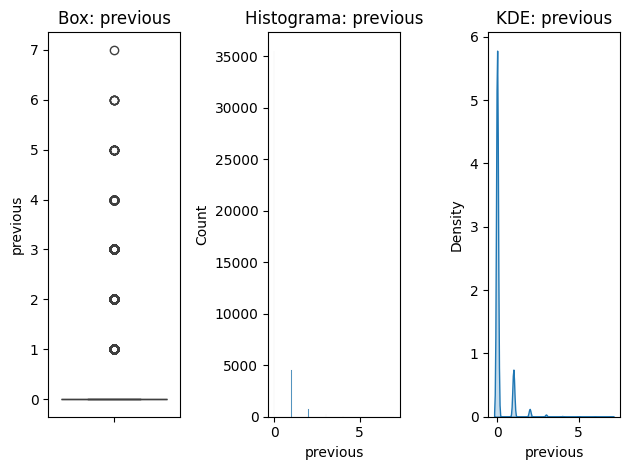

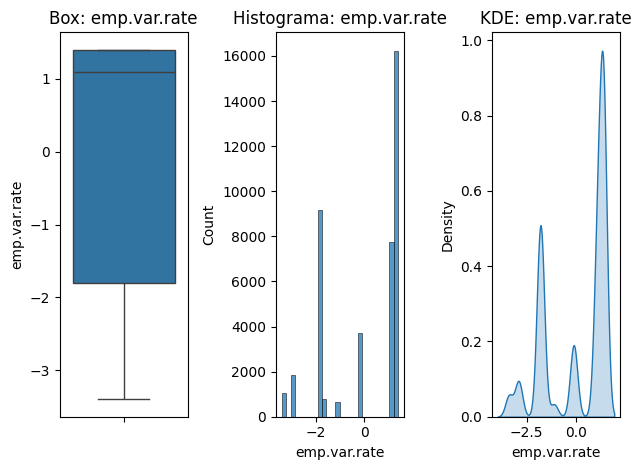

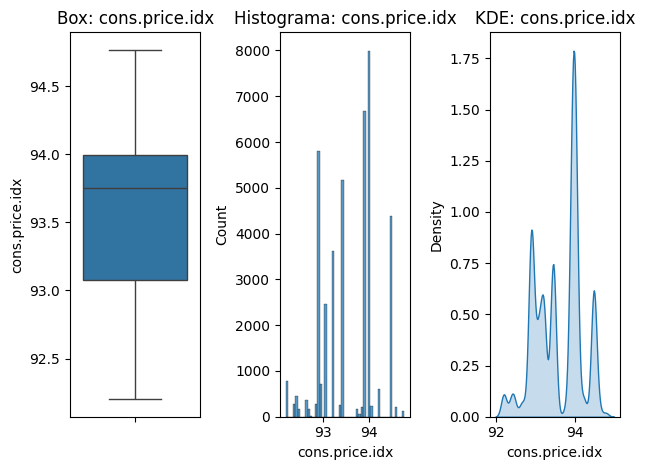

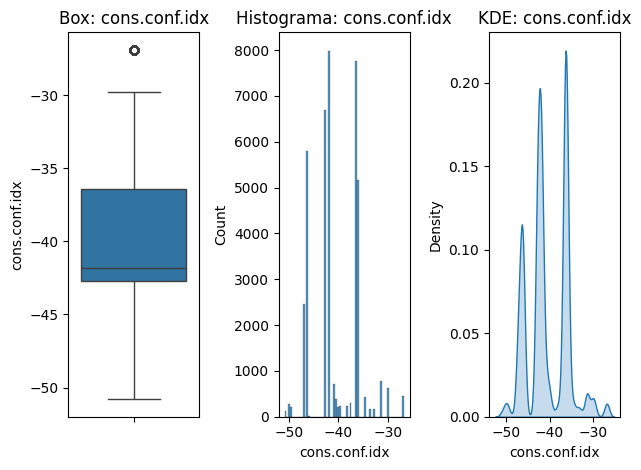

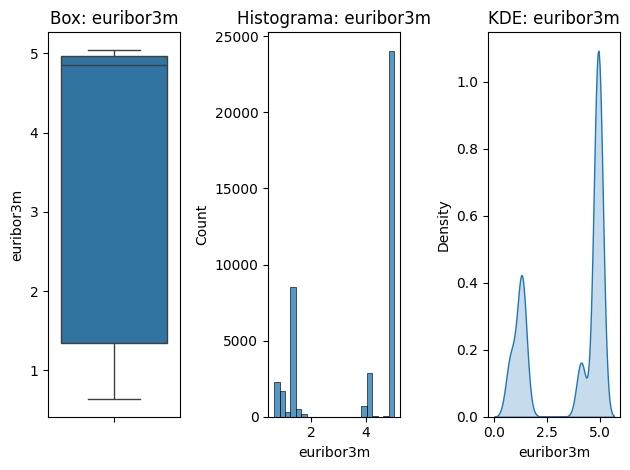

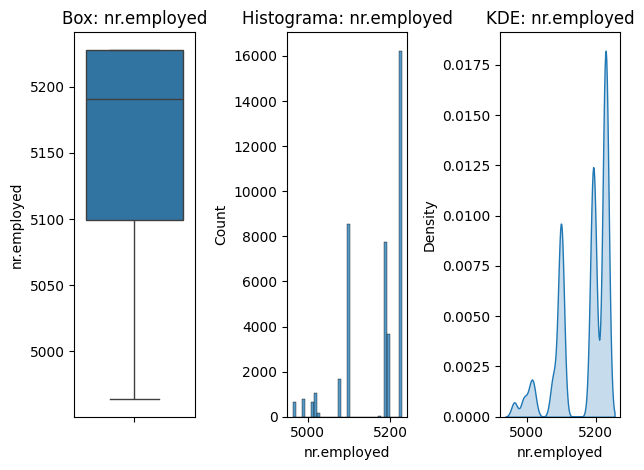

In [7]:
# Lista de columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(include="object").columns.tolist()

#Visualización de datos numéricos

for col in numeric_cols:
    plt.Figure(figsize=(10,14))

    plt.subplot(1,3,1)
    sns.boxplot(y=df[col])
    plt.title(f"Box: {col}")

    plt.subplot(1,3,2)
    sns.histplot(x=df[col])
    plt.title(f"Histograma: {col}")

    plt.subplot(1,3,3)
    sns.kdeplot(x=df[col], fill=True)
    plt.title(f"KDE: {col}")

    plt.tight_layout()
    plt.show()

#Entrenamiento del modelo

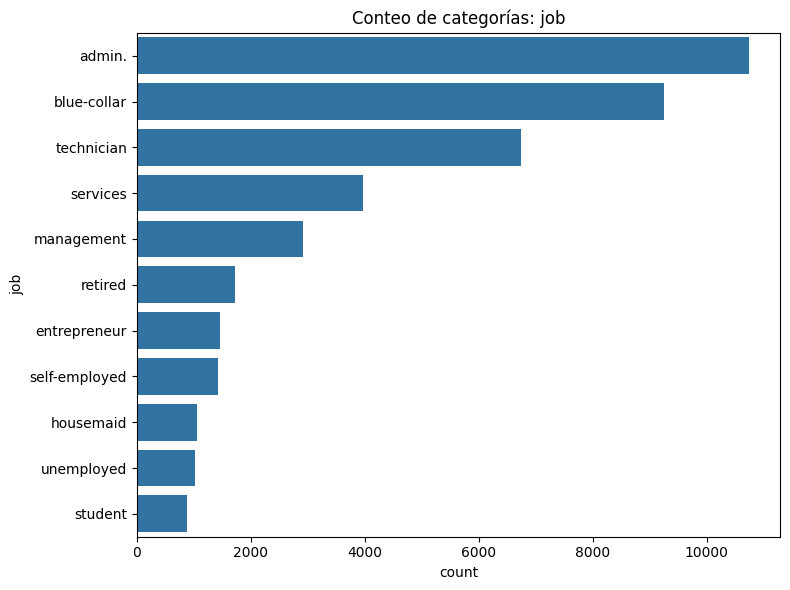

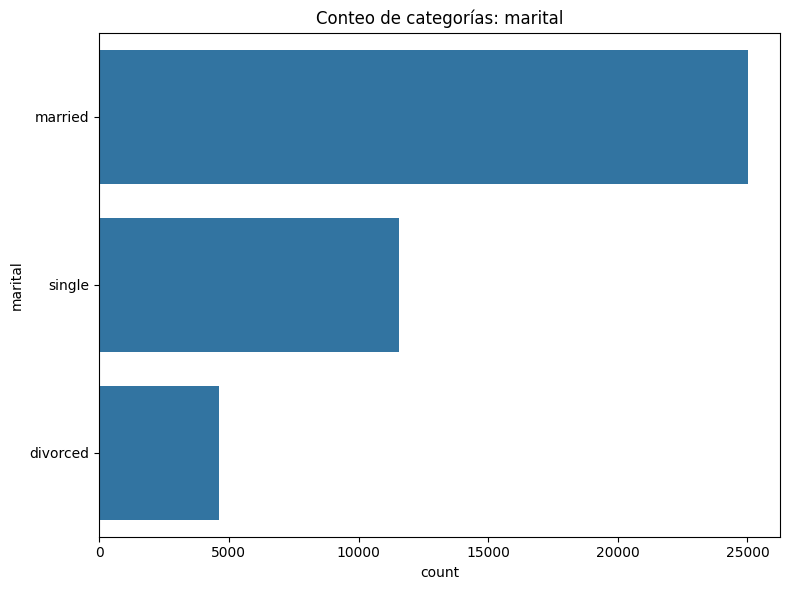

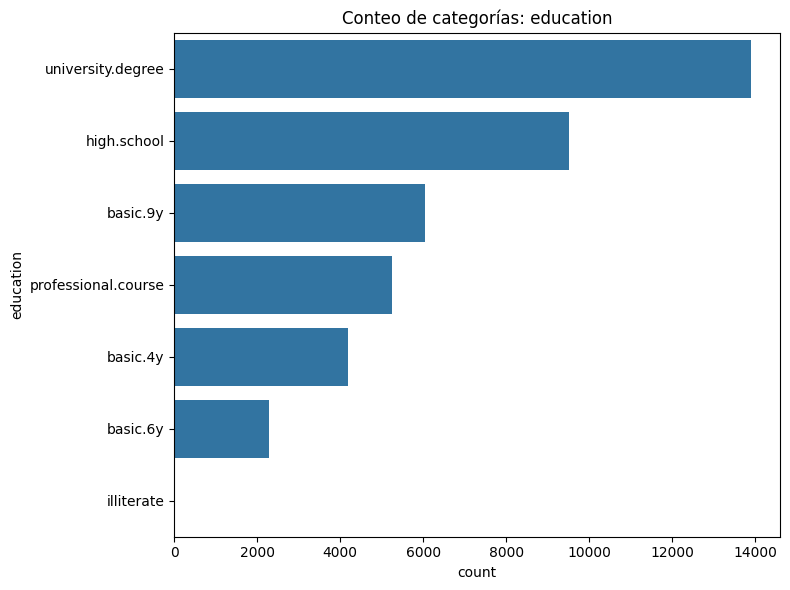

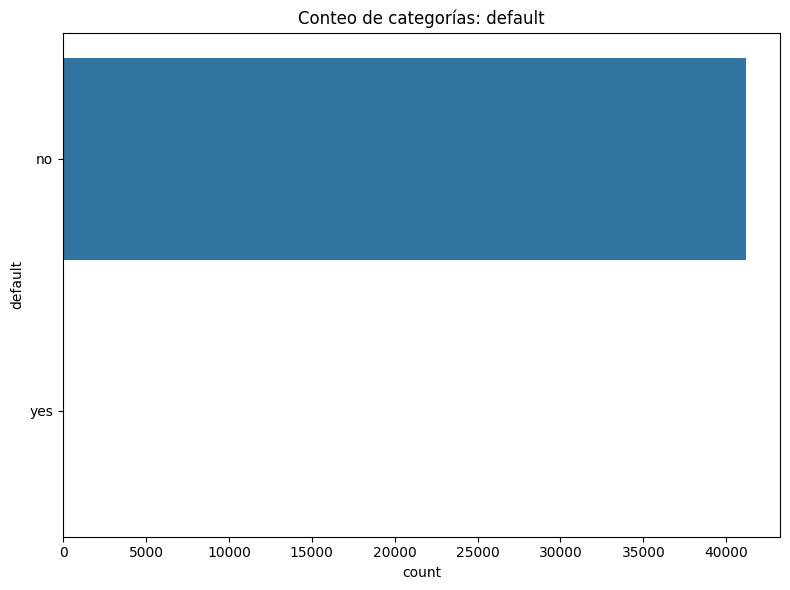

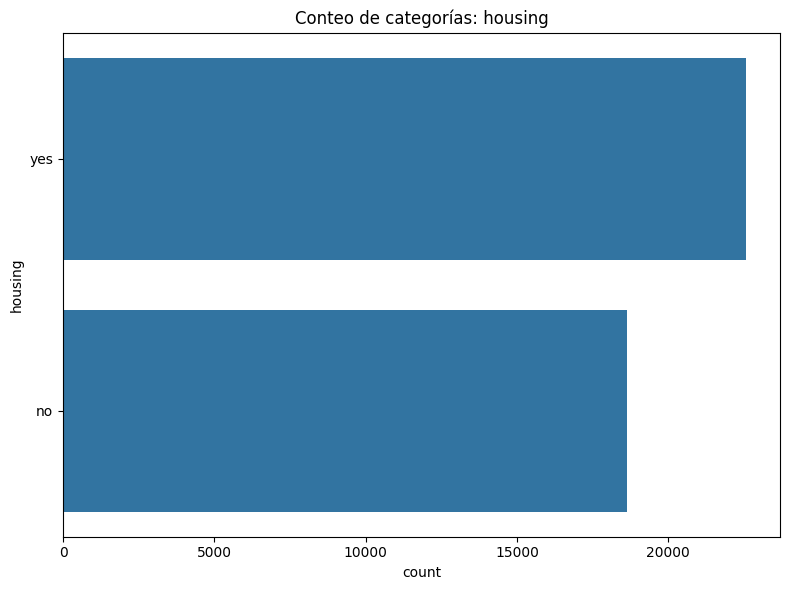

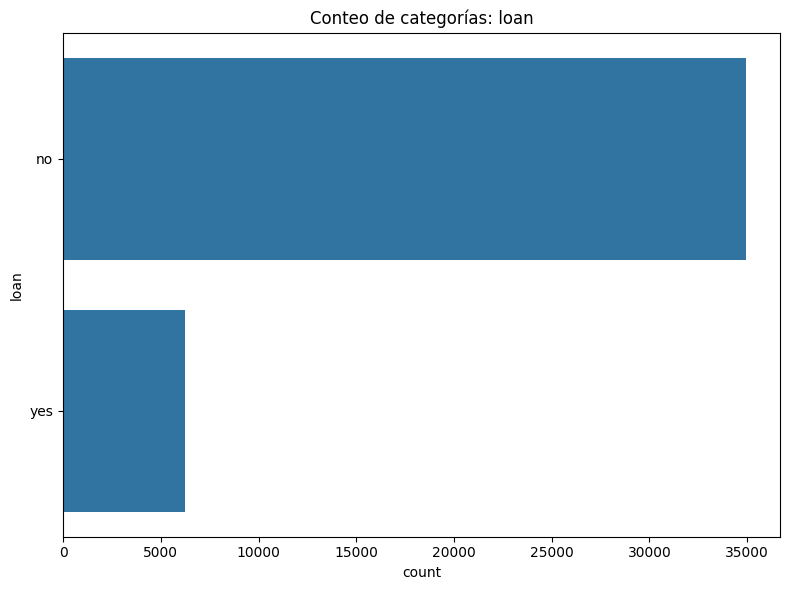

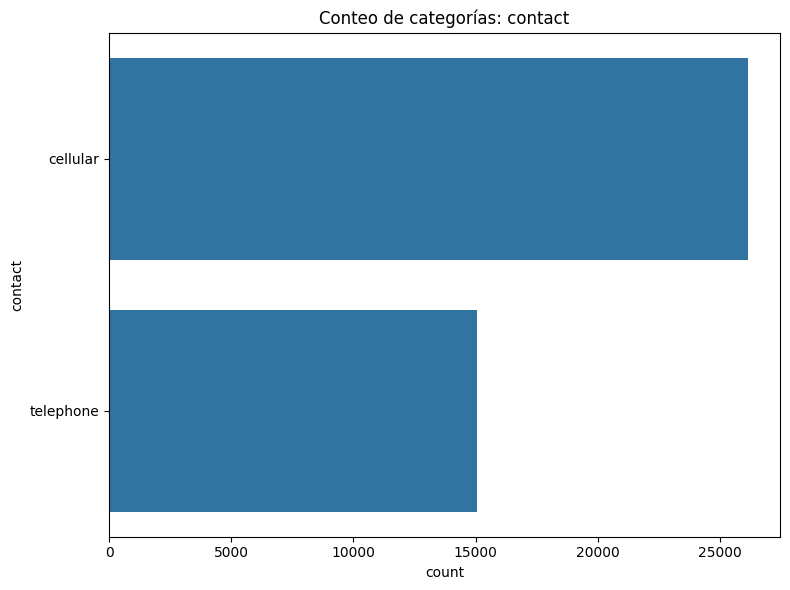

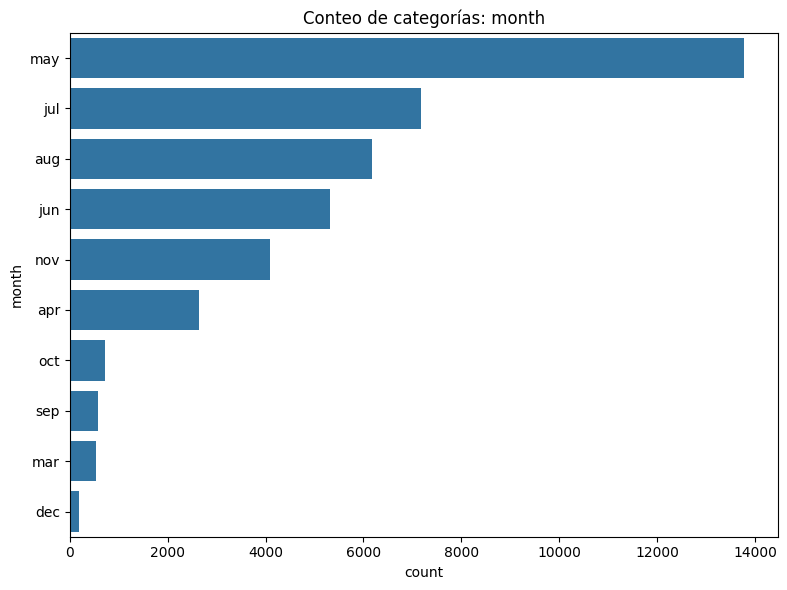

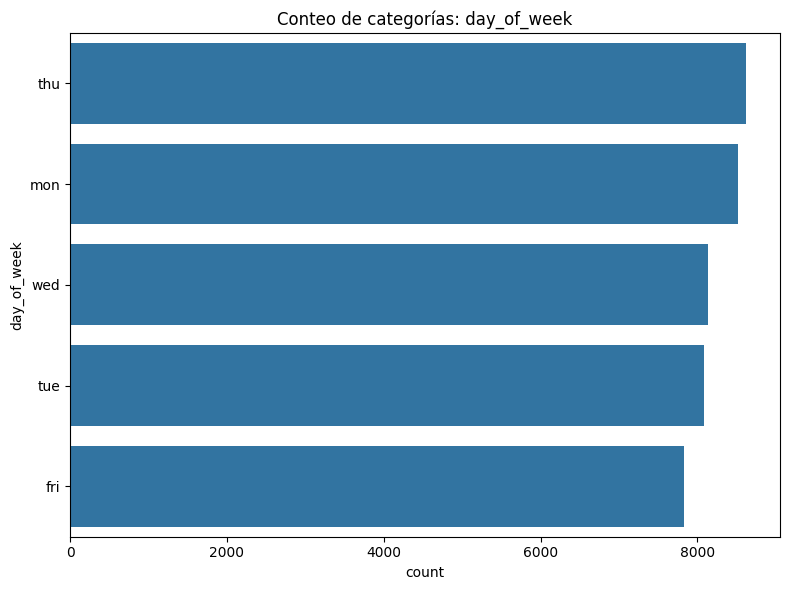

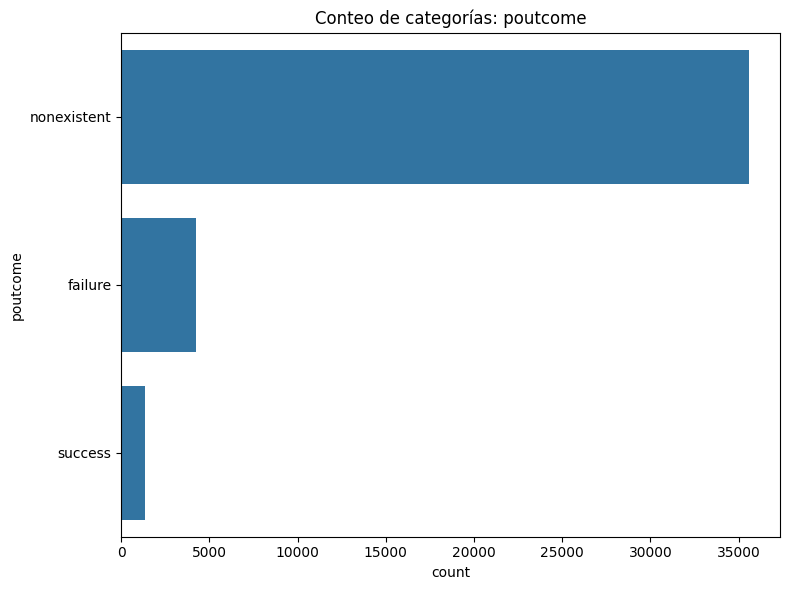

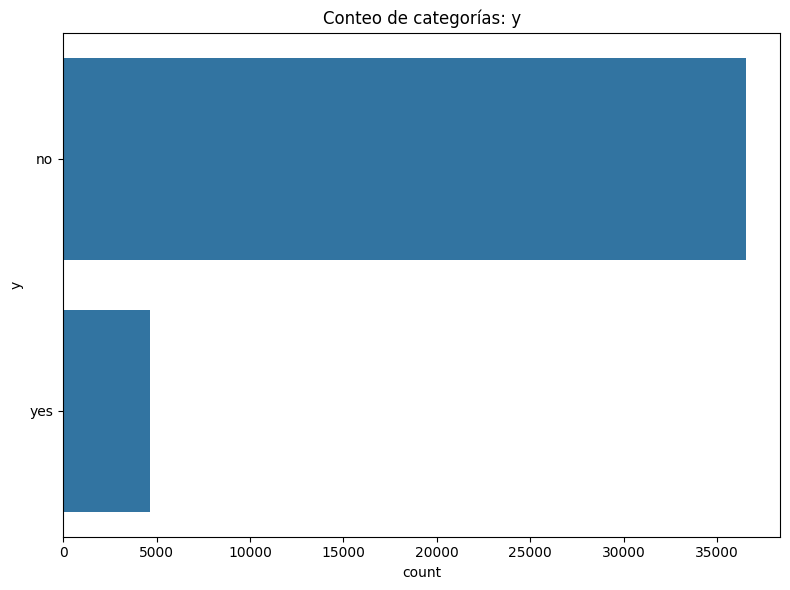

In [8]:
# Visualización de datos categóricos

for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Conteo de categorías: {col}")
    plt.tight_layout()
    plt.show()

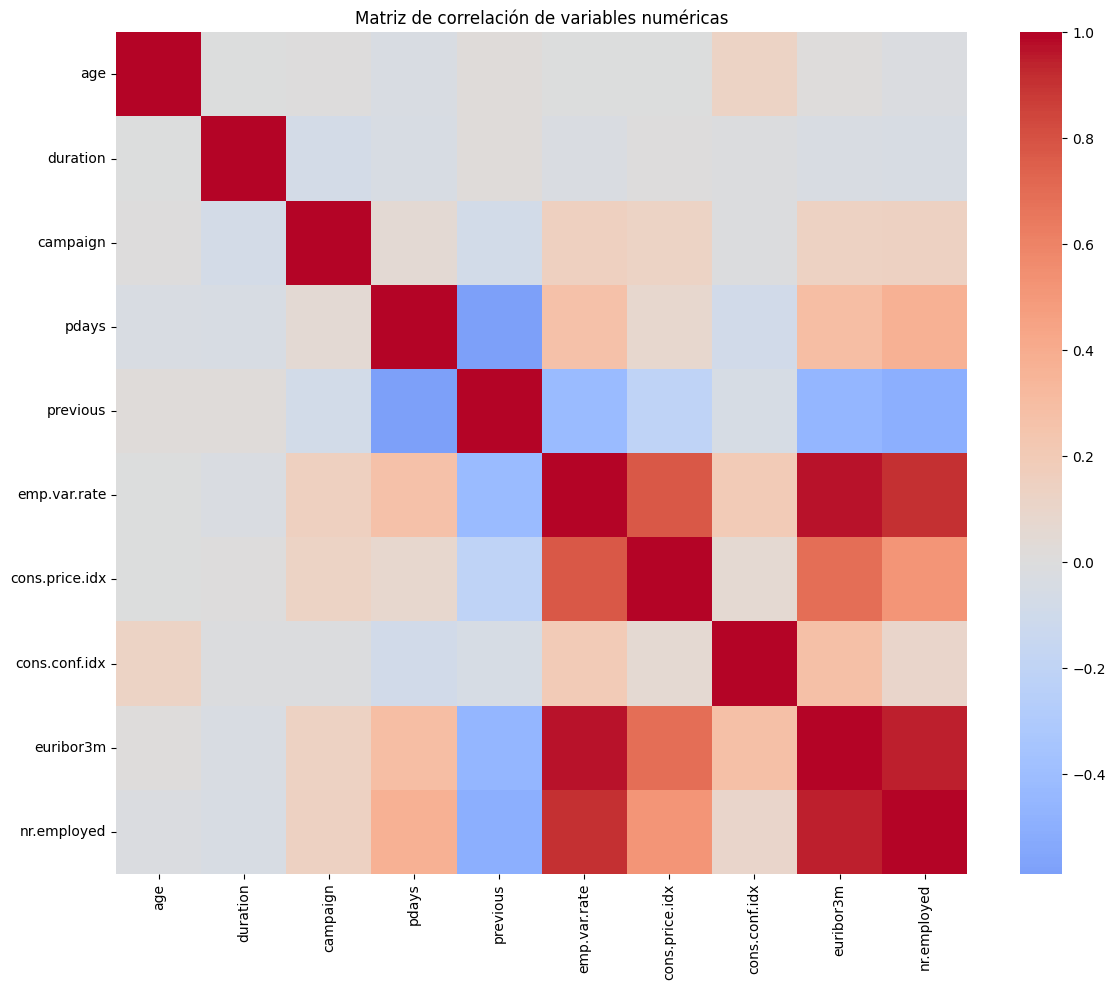

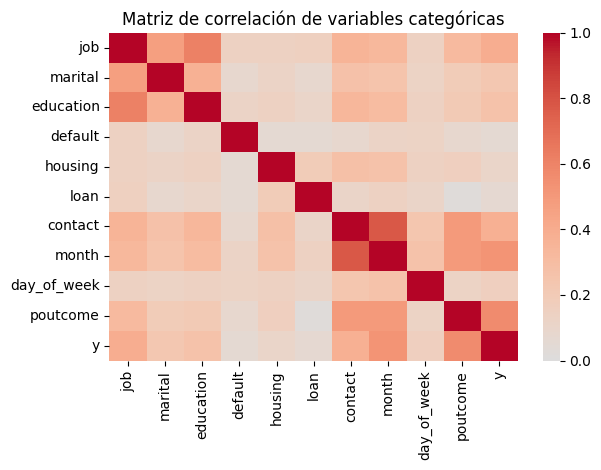

In [9]:
# Correlaciones

numeric_cols = df.select_dtypes(include="number").columns
numeric_corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(numeric_corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

#Cramer's V para variables categórics

categorical_cols = df.select_dtypes(include="object").columns
def cramers_V(x, y): # se define una función para calcular el estadístico de Cramér's V.
    t = pd.crosstab(x, y) #Se establece una tabla de contingencia.
    n = t.to_numpy().sum() #Se obtiene el número total de observaciones de cada caso. 
    exp = np.outer(t.sum(axis=1), t.sum(axis=0)) / n #Se calcula la tabla de frecuencias esperadas.
    chi2 = ((t-exp)**2 / exp).to_numpy().sum() #Se calcula el estadístico Chi-cuadrado.
    r, k = t.shape #Se obtienen el número de filas y columnas de la tabla de contingencia.
    return np.sqrt(chi2 / (n * (min(r-1, k-1))))**0.5 #Se calcula y devuelve el varlor de Cramer's V.

categorical_corr = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        categorical_corr.loc[col1, col2] = cramers_V(df[col1], df[col2])


#Visualización de la matriz de correlación categórica

plt.Figure(figsize=(12,10))
sns.heatmap(categorical_corr.astype(float), cmap='coolwarm', vmin=0, vmax=1, center=0)
plt.title("Matriz de correlación de variables categóricas")
plt.tight_layout()
plt.show()





## Conclusión breve del EDA
- El dataset quedó **cargado y depurado** (sin `NaN`, sin `"unknown"` y sin duplicados exactos, según la validación realizada).
- La variable objetivo `y` presenta **desbalance** (muchos más `no` que `yes`), así que para el entrenamiento conviene priorizar métricas como **PR-AUC**, **recall/F1** de la clase `yes` (además de ROC-AUC).
- En las variables numéricas, el heatmap ayuda a identificar **relaciones fuertes** (posible redundancia/colinealidad) entre indicadores macroeconómicos.
- En las variables categóricas, la matriz de asociación (p. ej. Cramér’s V) permite ubicar **pares de variables con alta relación**, útiles para interpretar el fenómeno y vigilar redundancias.
- Próximo paso: preparar el dataset para modelado **excluyendo `duration`** (fuga de información) y definir un **split temporal** para evaluar de forma realista.

#Entrenamiento del modelo

In [10]:
#Variable objetivo

y = df["y"] # definición de la varialbe objetivo

x = df.drop(columns=["y", "duration"]) # Se definen las variables explicativas, escluyendo la objetivo y la que fuga información.

print("x shape:", x.shape) #muestra las variables explicativas o independientes
print("y shape:", y.shape) #muestra la variable objetivo.
print("Columnas en x:", x.columns.tolist())
print("Valores únicos en y:", y.value_counts(normalize=True))


x shape: (41188, 19)
y shape: (41188,)
Columnas en x: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Valores únicos en y: y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [11]:
#Split temporal siguiendo el orden cronológico (temporal 80/20)

cut = int(len(df) * 0.8)

x_train, x_test = x.iloc[:cut], x.iloc[cut:] #definición de la proporción de variables explicativas de entrenamiento y prueba.
y_train, y_test = y.iloc[:cut], y.iloc[cut:] #definición de la proporción de variable objetivo de entrenamiento y prueba.

print("Train: ", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)

Train:  (32950, 19) (32950,)
Test:  (8238, 19) (8238,)


In [12]:
# Carga de librerías para el preprocesamiento y modelado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, roc_auc_score, classification_report, confusion_matrix

# Conversión de "y" a una variable binaria  0/1
y_train_bin = (y_train == 'yes').astype(int) # conversión de la variable objetivo de entrenamiento a formato binario.
y_test_bin = (y_test == 'yes').astype(int) # conversión de la variable objetivo de prueba a formato binario.

# Separación de columnas numéricas y categóricas
numeric_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

# Preprocesamiento de datos (escalado numérico + OneHot en categóricas)
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
 ])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
 ) #definición del preprocesamiento de datos.

# Creación del pipeline de modelado
model_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="saga"
    ))
]) # definición del pipeline de modelado.

model_pipeline.fit(x_train, y_train_bin) #entrenamiento del modelo con los datos de entrenamiento.

prob = model_pipeline.predict_proba(x_test)[:, 1] #predicción de probabilidades con los datos de prueba del modelo entrenado.
pred = (prob >= 0.5).astype(int) #predicción de clases usando umbral 0.5 (ajustable).

print("PR-AUC:", average_precision_score(y_test_bin, prob)) #Calulo y visualización del área bajo la curva Precision-Recall.
print("ROC-AUC:", roc_auc_score(y_test_bin, prob)) #Calulo y visualización del área bajo la curva ROC.
print(classification_report(y_test_bin, pred, target_names=['no', 'yes'])) #Calculo y visualización del informe de clasificación.
print("Matriz de confusión:\n", confusion_matrix(y_test_bin, pred))

PR-AUC: 0.5333271386498267
ROC-AUC: 0.7107871113776626
              precision    recall  f1-score   support

          no       0.84      0.31      0.45      5698
         yes       0.36      0.87      0.51      2540

    accuracy                           0.48      8238
   macro avg       0.60      0.59      0.48      8238
weighted avg       0.69      0.48      0.47      8238

Matriz de confusión:
 [[1740 3958]
 [ 335 2205]]


/Users/HSYL/Desktop/Proyectos_ciencia_de_datos/Marketing Bancario/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
